In [1]:
import glob
import re

import IPython.display as disp
import numpy as np
from PIL import Image
import tensorflow as tf

In [2]:
def pair_gen(path):
    for flnm in glob.glob(path + '/gauss_*.png'):
        yield (flnm, flnm.replace('gauss', 'lens'))

def open_files(record, label):
    return tf.read_file(record), tf.read_file(label)

def convert_pictures(record, label):
    return tf.image.decode_png(record), tf.image.decode_png(label)

In [3]:
it = tf.data.Dataset.from_generator(lambda: pair_gen('neuro_images/lens_white_bg'), 
                                    output_types=(tf.string, tf.string))\
    .map(open_files)\
    .map(convert_pictures)\
    .make_one_shot_iterator()

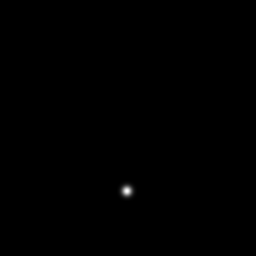

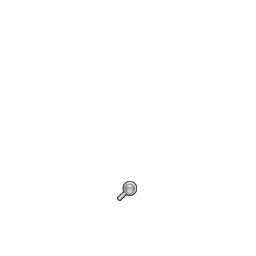

In [4]:
s = tf.Session()

d, l = s.run(it.get_next())

disp.display(Image.fromarray(d))
disp.display(Image.fromarray(np.tile(l, [1, 1, 3])))